# Compare bwa and d-list alignments

In [1]:
bp = "PRJNA665227"
fastq_folder = f"/home/laura/projects/virus-watch-data/{bp}"
u_tax_csv = "/home/laura/projects/virus-watch-data/virus_ref/u_tax_nodup_clu.csv"

In [2]:
import kb_python.utils as kb_utils
import numpy as np
import gget
from scipy import stats
import anndata
import pandas as pd
import json
import os
import glob
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
%config InlineBackend.figure_format='retina'

# Path to Krona tool
ktImportText = "/home/laura/bin/ktImportText"

def nd(arr):
    """
    Function to transform numpy matrix to nd array.
    """
    return np.asarray(arr).reshape(-1)

# Load data

In [3]:
bwa_adata = anndata.read(f"{fastq_folder}/full_index_bwa/virus_meta_host.h5ad")
# # Remove below threshold viruses
# bwa_adata = bwa_adata[:, bwa_adata.var["v_type"] != "below_threshold"]
bwa_adata

AnnData object with n_obs × n_vars = 223629 × 4686
    obs: 'sample_barcode', 'srr', 'Run', 'donor_animal', 'Experiment', 'mdck_spike_in', 'hours_post_innoculation', 'day_post_infection', 'dpi', 'dpi_accessions', 'dpi_clean', 'leiden', 'celltype_clusters', 'celltype', 'species', 'dpi_clean_merged'
    var: 'v_type'

In [4]:
dna_adata = anndata.read(f"{fastq_folder}/full_index/virus_meta_host.h5ad")
# # Remove below threshold viruses
# dna_adata = dna_adata[:, dna_adata.var["v_type"] != "below_threshold"]
dna_adata

AnnData object with n_obs × n_vars = 227212 × 14148
    obs: 'sample_barcode', 'srr', 'Run', 'donor_animal', 'Experiment', 'mdck_spike_in', 'hours_post_innoculation', 'day_post_infection', 'dpi', 'dpi_accessions', 'dpi_clean', 'leiden', 'celltype_clusters', 'celltype', 'species', 'dpi_clean_merged'
    var: 'v_type'

In [5]:
cdna_adata = anndata.read(f"{fastq_folder}/full_index_cdna/virus_meta_host.h5ad")
# # Remove below threshold viruses
# cdna_adata = cdna_adata[:, cdna_adata.var["v_type"] != "below_threshold"]
cdna_adata

AnnData object with n_obs × n_vars = 228317 × 15130
    obs: 'sample_barcode', 'srr', 'Run', 'donor_animal', 'Experiment', 'mdck_spike_in', 'hours_post_innoculation', 'day_post_infection', 'dpi', 'dpi_accessions', 'dpi_clean', 'leiden', 'celltype_clusters', 'celltype', 'species', 'dpi_clean_merged'
    var: 'v_type'

In [6]:
cdna_dna_adata = anndata.read(f"{fastq_folder}/full_index_dna_cdna/virus_meta_host.h5ad")
# # Remove below threshold viruses
# cdna_dna_adata = cdna_dna_adata[:, cdna_dna_adata.var["v_type"] != "below_threshold"]
cdna_dna_adata

AnnData object with n_obs × n_vars = 226993 × 14142
    obs: 'sample_barcode', 'srr', 'Run', 'donor_animal', 'Experiment', 'mdck_spike_in', 'hours_post_innoculation', 'day_post_infection', 'dpi', 'dpi_accessions', 'dpi_clean', 'leiden', 'celltype_clusters', 'celltype', 'species', 'dpi_clean_merged'
    var: 'v_type'

In [7]:
nomask_adata = anndata.read(f"{fastq_folder}/full_index_no-host-mask/virus_meta_host.h5ad")
# # Remove below threshold viruses
# nomask_adata = nomask_adata[:, nomask_adata.var["v_type"] != "below_threshold"]
nomask_adata

AnnData object with n_obs × n_vars = 234946 × 15002
    obs: 'sample_barcode', 'srr', 'Run', 'donor_animal', 'Experiment', 'mdck_spike_in', 'hours_post_innoculation', 'day_post_infection', 'dpi', 'dpi_accessions', 'dpi_clean', 'leiden', 'celltype_clusters', 'celltype', 'species', 'dpi_clean_merged'
    var: 'v_type'

In [8]:
eachK_adata = anndata.read(f"{fastq_folder}/full_index_dna_cdna_CheckEachKmer/virus_meta_host.h5ad")
# # Remove below threshold viruses
# eachK_adata = eachK_adata[:, eachK_adata.var["v_type"] != "below_threshold"]
eachK_adata

AnnData object with n_obs × n_vars = 227001 × 14135
    obs: 'sample_barcode', 'srr', 'Run', 'donor_animal', 'Experiment', 'mdck_spike_in', 'hours_post_innoculation', 'day_post_infection', 'dpi', 'dpi_accessions', 'dpi_clean', 'leiden', 'celltype_clusters', 'celltype', 'species', 'dpi_clean_merged'
    var: 'v_type'

In [9]:
cdna_dna_amb_adata = anndata.read(f"{fastq_folder}/full_index_dna_cdna_amb/virus_meta_host.h5ad")
# # Remove below threshold viruses
# cdna_dna_amb_adata = cdna_dna_amb_adata[:, cdna_dna_amb_adata.var["v_type"] != "below_threshold"]
cdna_dna_amb_adata

AnnData object with n_obs × n_vars = 226854 × 14078
    obs: 'sample_barcode', 'srr', 'Run', 'donor_animal', 'Experiment', 'mdck_spike_in', 'hours_post_innoculation', 'day_post_infection', 'dpi', 'dpi_accessions', 'dpi_clean', 'leiden', 'celltype_clusters', 'celltype', 'species', 'dpi_clean_merged'
    var: 'v_type'

In [10]:
busfil_adata = anndata.read(f"{fastq_folder}/host_flag/virus_masked_meta.h5ad")
busfil_adata

AnnData object with n_obs × n_vars = 232950 × 12182
    obs: 'sample_barcode', 'srr', 'Run', 'donor_animal', 'Experiment', 'mdck_spike_in', 'hours_post_innoculation', 'day_post_infection', 'dpi', 'dpi_accessions', 'dpi_clean', 'leiden', 'celltype_clusters', 'celltype', 'species', 'dpi_clean_merged'
    var: 'v_type'

In [11]:
busfil_cdna_dna_adata = anndata.read(f"{fastq_folder}/host_flag/virus_cdna_dna_masked_meta.h5ad")
busfil_cdna_dna_adata

AnnData object with n_obs × n_vars = 225898 × 11176
    obs: 'sample_barcode', 'srr', 'Run', 'donor_animal', 'Experiment', 'mdck_spike_in', 'hours_post_innoculation', 'day_post_infection', 'dpi', 'dpi_accessions', 'dpi_clean', 'leiden', 'celltype_clusters', 'celltype', 'species', 'dpi_clean_merged'
    var: 'v_type'

___

In [12]:
colors = ["gold", "orange", "#e06237", "#b2172b", "#7d0d0f", "#3e8938", "#b8dd5a", "#003049", "grey"]

CPU times: user 59.1 s, sys: 1min 29s, total: 2min 28s
Wall time: 2min 32s


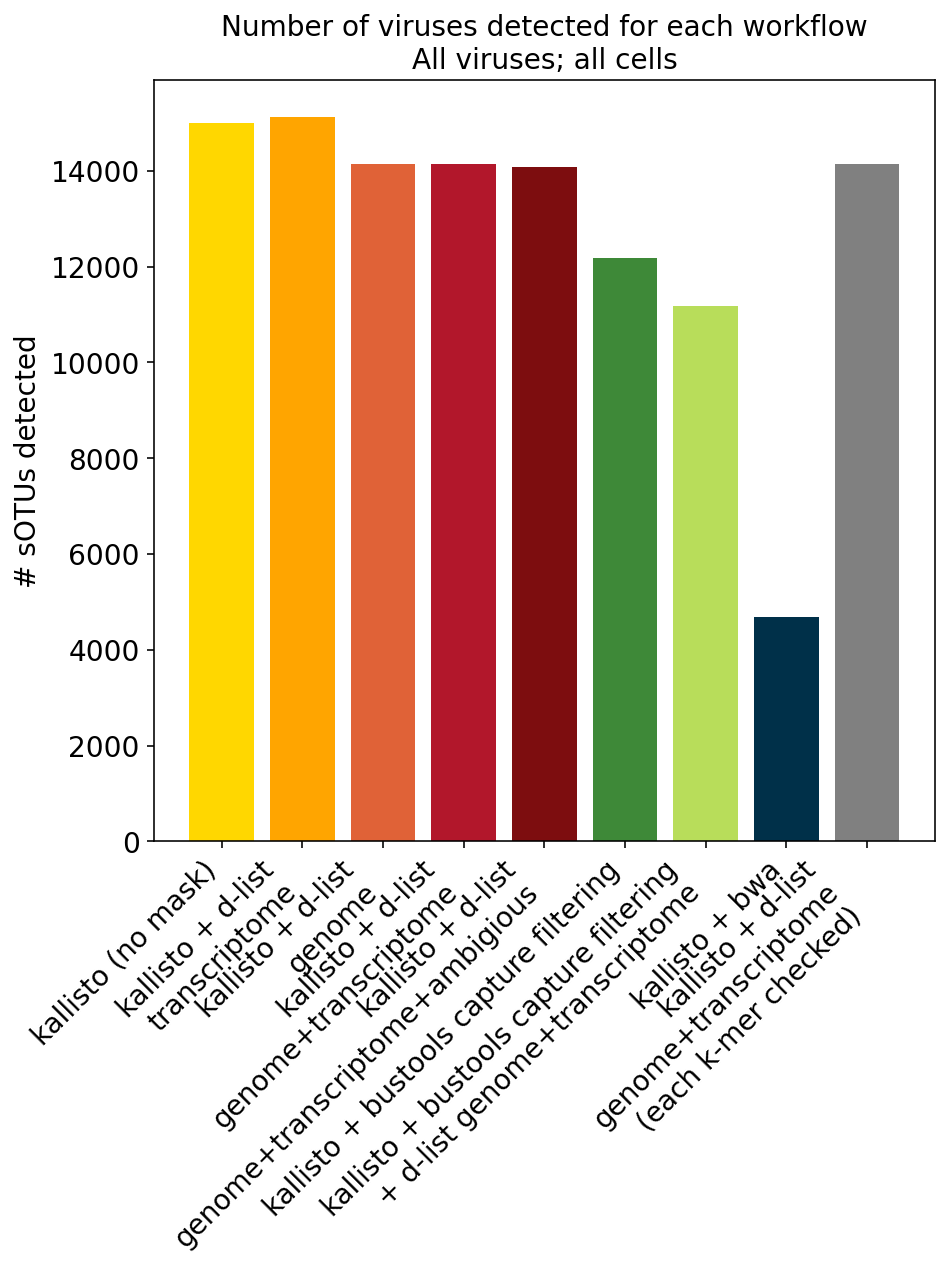

In [13]:
%%time
fig, ax = plt.subplots(figsize=(7, 7))
width = 0.8
fontsize = 14

# Get number of viruses with counts > 0
nomask_vcounts = (np.array(nomask_adata.X.todense()) > 0).sum(0)    
dna_vcounts = (np.array(dna_adata.X.todense()) > 0).sum(0)    
cdna_vcounts = (np.array(cdna_adata.X.todense()) > 0).sum(0)    
cdna_dna_vcounts = (np.array(cdna_dna_adata.X.todense()) > 0).sum(0)    
cdna_dna_amb_vcounts = (np.array(cdna_dna_amb_adata.X.todense()) > 0).sum(0)    
bus_vcounts = (np.array(busfil_adata.X.todense()) > 0).sum(0)   
bus_cdna_dna_vcounts = (np.array(busfil_cdna_dna_adata.X.todense()) > 0).sum(0) 
bwa_vcounts = (np.array(bwa_adata.X.todense()) > 0).sum(0)    
eachK_counts = (np.array(eachK_adata.X.todense()) > 0).sum(0)    

labels = [
    "kallisto (no mask)",
    "kallisto + d-list\ntranscriptome",
    "kallisto + d-list\ngenome",
    "kallisto + d-list\ngenome+transcriptome",
    "kallisto + d-list\ngenome+transcriptome+ambigious",
    "kallisto + bustools capture filtering",
    "kallisto + bustools capture filtering\n+ d-list genome+transcriptome",
    "kallisto + bwa",
    "kallisto + d-list\ngenome+transcriptome\n(each k-mer checked)",
]

ax.bar(0, len(nomask_vcounts), width, color=colors[0])
ax.bar(1, len(cdna_vcounts), width, color=colors[1])
ax.bar(2, len(dna_vcounts), width, color=colors[2])
ax.bar(3, len(cdna_dna_vcounts), width, color=colors[3])
ax.bar(4, len(cdna_dna_amb_vcounts), width, color=colors[4])
ax.bar(5, len(bus_vcounts), width, color=colors[5])
ax.bar(6, len(bus_cdna_dna_vcounts), width, color=colors[6])
ax.bar(7, len(bwa_vcounts), width, color=colors[7])
ax.bar(8, len(eachK_counts), width, color=colors[8])

# ax.set_yscale("symlog")
ax.margins(x=0.05)

ax.tick_params(axis="both", labelsize=fontsize)
ax.set_xticks(np.arange(len(labels)), labels, rotation=45, ha="right", fontsize=fontsize)

# ax.set_xlabel("Workflow", fontsize=fontsize)
ax.set_ylabel("# sOTUs detected", fontsize=fontsize)

ax.set_title(f"Number of viruses detected for each workflow\nAll viruses; all cells", fontsize=fontsize)

# ax.grid(True, which="both", color="lightgray", ls="--", lw=1)
# ax.set_axisbelow(True)

# plt.savefig("figures/3.6_bwa_vs_dlist.png", dpi=300, bbox_inches="tight")

fig.show()

CPU times: user 2.38 s, sys: 1.78 s, total: 4.16 s
Wall time: 3.87 s


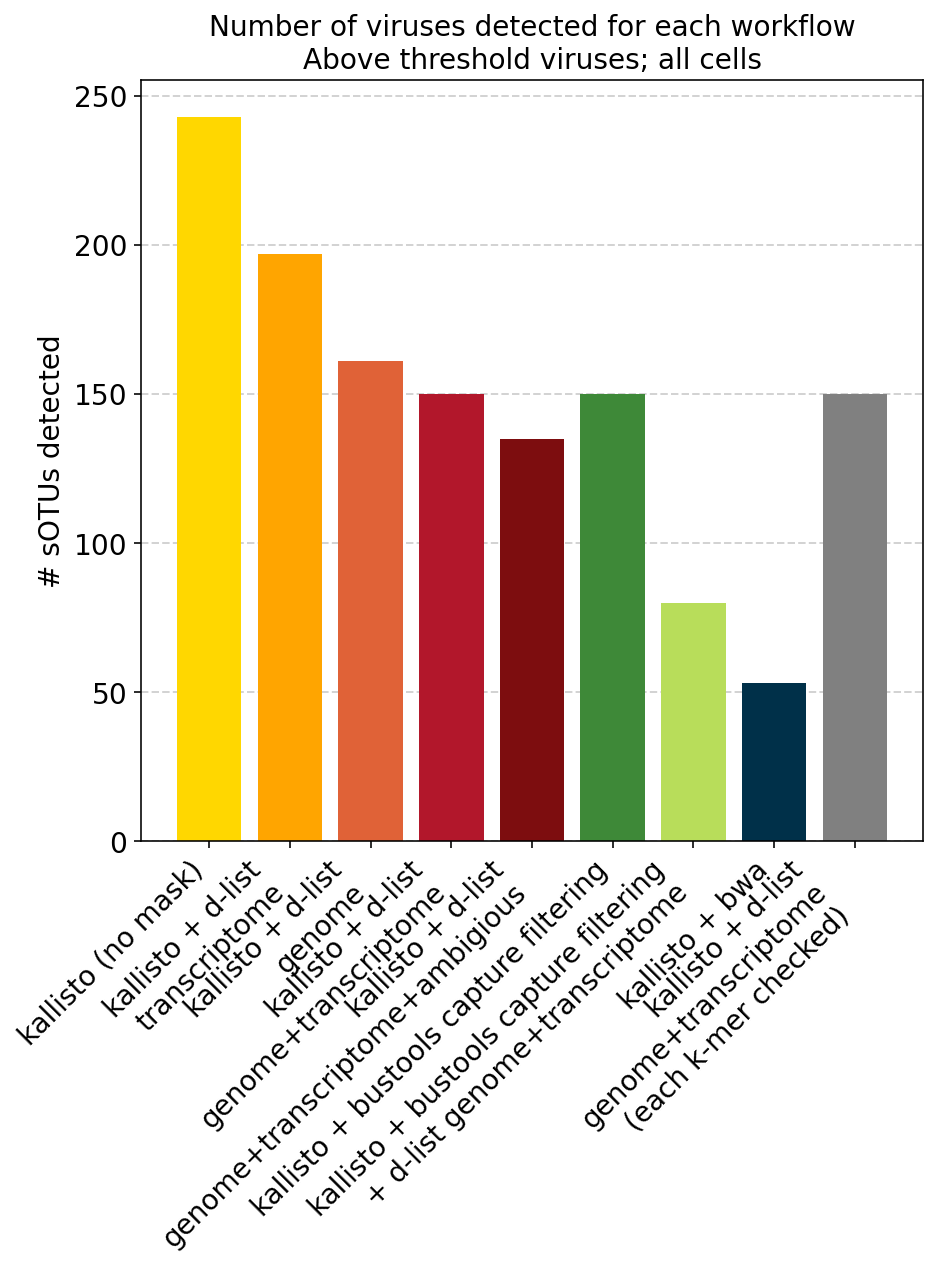

In [14]:
%%time
fig, ax = plt.subplots(figsize=(7, 7))
width = 0.8
fontsize = 14

# Get number of viruses with counts > 0
nomask_vcounts = (np.array(nomask_adata[:, nomask_adata.var["v_type"] != "below_threshold"].X.todense()) > 0).sum(0)    
dna_vcounts = (np.array(dna_adata[:, dna_adata.var["v_type"] != "below_threshold"].X.todense()) > 0).sum(0)    
cdna_vcounts = (np.array(cdna_adata[:, cdna_adata.var["v_type"] != "below_threshold"].X.todense()) > 0).sum(0)    
cdna_dna_vcounts = (np.array(cdna_dna_adata[:, cdna_dna_adata.var["v_type"] != "below_threshold"].X.todense()) > 0).sum(0)    
cdna_dna_amb_vcounts = (np.array(cdna_dna_amb_adata[:, cdna_dna_amb_adata.var["v_type"] != "below_threshold"].X.todense()) > 0).sum(0)    
bus_vcounts = (np.array(busfil_adata[:, busfil_adata.var["v_type"] != "below_threshold"].X.todense()) > 0).sum(0)   
bus_cdna_dna_vcounts = (np.array(busfil_cdna_dna_adata[:, busfil_cdna_dna_adata.var["v_type"] != "below_threshold"].X.todense()) > 0).sum(0)   
bwa_vcounts = (np.array(bwa_adata[:, bwa_adata.var["v_type"] != "below_threshold"].X.todense()) > 0).sum(0)    
eachK_counts = (np.array(eachK_adata[:, eachK_adata.var["v_type"] != "below_threshold"].X.todense()) > 0).sum(0)    

labels = [
    "kallisto (no mask)",
    "kallisto + d-list\ntranscriptome",
    "kallisto + d-list\ngenome",
    "kallisto + d-list\ngenome+transcriptome",
    "kallisto + d-list\ngenome+transcriptome+ambigious",
    "kallisto + bustools capture filtering",
    "kallisto + bustools capture filtering\n+ d-list genome+transcriptome",
    "kallisto + bwa",
    "kallisto + d-list\ngenome+transcriptome\n(each k-mer checked)",
]

ax.bar(0, len(nomask_vcounts), width, color=colors[0])
ax.bar(1, len(cdna_vcounts), width, color=colors[1])
ax.bar(2, len(dna_vcounts), width, color=colors[2])
ax.bar(3, len(cdna_dna_vcounts), width, color=colors[3])
ax.bar(4, len(cdna_dna_amb_vcounts), width, color=colors[4])
ax.bar(5, len(bus_vcounts), width, color=colors[5])
ax.bar(6, len(bus_cdna_dna_vcounts), width, color=colors[6])
ax.bar(7, len(bwa_vcounts), width, color=colors[7])
ax.bar(8, len(eachK_counts), width, color=colors[8])

# ax.set_yscale("symlog")
ax.margins(x=0.05)

ax.tick_params(axis="both", labelsize=fontsize)
ax.set_xticks(np.arange(len(labels)), labels, rotation=45, ha="right", fontsize=fontsize)

# ax.set_xlabel("Workflow", fontsize=fontsize)
ax.set_ylabel("# sOTUs detected", fontsize=fontsize)

ax.set_title(f"Number of viruses detected for each workflow\nAbove threshold viruses; all cells", fontsize=fontsize)

ax.grid(True, which="both", color="lightgray", ls="--", lw=1)
ax.set_axisbelow(True)
ax.xaxis.grid(False)

plt.savefig("figures/3.6_bwa_vs_dlist.png", dpi=300, bbox_inches="tight")

fig.show()

CPU times: user 2.19 s, sys: 1.57 s, total: 3.77 s
Wall time: 3.68 s


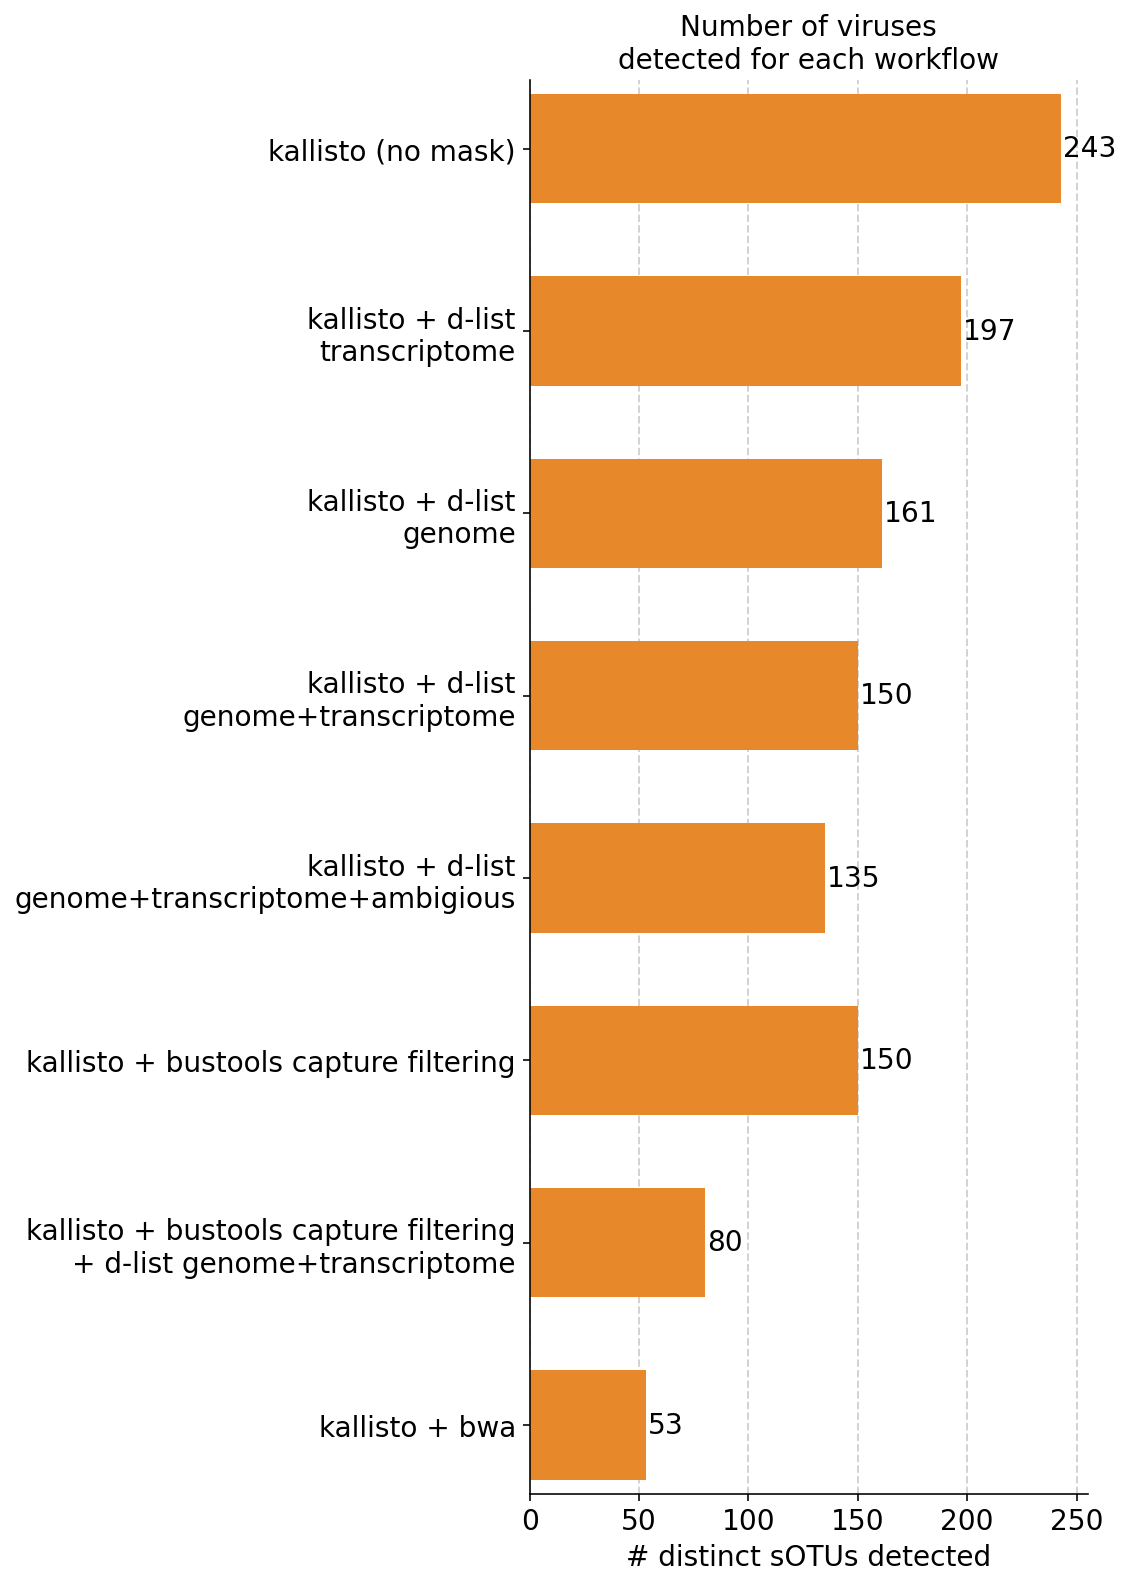

In [13]:
%%time
# Same but horizontal bars
fig, ax = plt.subplots(figsize=(5, 13))
width = 0.6
fontsize = 14

# Get number of viruses with counts > 0
nomask_vcounts = (np.array(nomask_adata[:, nomask_adata.var["v_type"] != "below_threshold"].X.todense()) > 0).sum(0)    
dna_vcounts = (np.array(dna_adata[:, dna_adata.var["v_type"] != "below_threshold"].X.todense()) > 0).sum(0)    
cdna_vcounts = (np.array(cdna_adata[:, cdna_adata.var["v_type"] != "below_threshold"].X.todense()) > 0).sum(0)    
cdna_dna_vcounts = (np.array(cdna_dna_adata[:, cdna_dna_adata.var["v_type"] != "below_threshold"].X.todense()) > 0).sum(0)    
cdna_dna_amb_vcounts = (np.array(cdna_dna_amb_adata[:, cdna_dna_amb_adata.var["v_type"] != "below_threshold"].X.todense()) > 0).sum(0)    
bus_vcounts = (np.array(busfil_adata[:, busfil_adata.var["v_type"] != "below_threshold"].X.todense()) > 0).sum(0)   
bus_cdna_dna_vcounts = (np.array(busfil_cdna_dna_adata[:, busfil_cdna_dna_adata.var["v_type"] != "below_threshold"].X.todense()) > 0).sum(0)   
bwa_vcounts = (np.array(bwa_adata[:, bwa_adata.var["v_type"] != "below_threshold"].X.todense()) > 0).sum(0)    
# eachK_counts = (np.array(eachK_adata[:, eachK_adata.var["v_type"] != "below_threshold"].X.todense()) > 0).sum(0)    

labels = [
    "kallisto (no mask)",
    "kallisto + d-list\ntranscriptome",
    "kallisto + d-list\ngenome",
    "kallisto + d-list\ngenome+transcriptome",
    "kallisto + d-list\ngenome+transcriptome+ambigious",
    "kallisto + bustools capture filtering",
    "kallisto + bustools capture filtering\n+ d-list genome+transcriptome",
    "kallisto + bwa",
    # "kallisto + d-list\ngenome+transcriptome\n(each k-mer checked)",
][::-1]

# ax.barh(7, len(nomask_vcounts), width, color=colors[0])
# ax.barh(6, len(cdna_vcounts), width, color=colors[1])
# ax.barh(5, len(dna_vcounts), width, color=colors[2])
# ax.barh(4, len(cdna_dna_vcounts), width, color=colors[3])
# ax.barh(3, len(cdna_dna_amb_vcounts), width, color=colors[4])
# ax.barh(2, len(bus_vcounts), width, color=colors[5])
# ax.barh(1, len(bus_cdna_dna_vcounts), width, color=colors[6])
# ax.barh(0, len(bwa_vcounts), width, color=colors[7])
# # ax.barh(8, len(eachK_counts), width, color=colors[8])

single_color = "#e7882a"
ax.barh(7, len(nomask_vcounts), width, color=single_color)
ax.text(len(nomask_vcounts)+1, 7, "{:,}".format(len(nomask_vcounts)), color="black", fontsize=fontsize, va="center", ha="left")

ax.barh(6, len(cdna_vcounts), width, color=single_color)
ax.text(len(cdna_vcounts)+1, 6, "{:,}".format(len(cdna_vcounts)), color="black", fontsize=fontsize, va="center", ha="left")

ax.barh(5, len(dna_vcounts), width, color=single_color)
ax.text(len(dna_vcounts)+1, 5, "{:,}".format(len(dna_vcounts)), color="black", fontsize=fontsize, va="center", ha="left")

ax.barh(4, len(cdna_dna_vcounts), width, color=single_color)
ax.text(len(cdna_dna_vcounts)+1, 4, "{:,}".format(len(cdna_dna_vcounts)), color="black", fontsize=fontsize, va="center", ha="left")

ax.barh(3, len(cdna_dna_amb_vcounts), width, color=single_color)
ax.text(len(cdna_dna_amb_vcounts)+1, 3, "{:,}".format(len(cdna_dna_amb_vcounts)), color="black", fontsize=fontsize, va="center", ha="left")

ax.barh(2, len(bus_vcounts), width, color=single_color)
ax.text(len(bus_vcounts)+1, 2, "{:,}".format(len(bus_vcounts)), color="black", fontsize=fontsize, va="center", ha="left")

ax.barh(1, len(bus_cdna_dna_vcounts), width, color=single_color)
ax.text(len(bus_cdna_dna_vcounts)+1, 1, "{:,}".format(len(bus_cdna_dna_vcounts)), color="black", fontsize=fontsize, va="center", ha="left")

ax.barh(0, len(bwa_vcounts), width, color=single_color)
ax.text(len(bwa_vcounts)+1, 0, "{:,}".format(len(bwa_vcounts)), color="black", fontsize=fontsize, va="center", ha="left")
# ax.barh(8, len(eachK_counts), width, color=single_color)

# ax.set_yscale("symlog")
ax.margins(y=0.01)

ax.tick_params(axis="both", labelsize=fontsize)
ax.set_yticks(np.arange(len(labels)), labels, fontsize=fontsize)

# ax.set_xlabel("Workflow", fontsize=fontsize)
ax.set_xlabel("# distinct sOTUs detected", fontsize=fontsize)
ax.spines[["right", "top"]].set_visible(False)

ax.set_title(f"Number of viruses\ndetected for each workflow", fontsize=fontsize)

ax.grid(True, which="both", color="lightgray", ls="--", lw=1)
ax.set_axisbelow(True)
ax.yaxis.grid(False)

plt.savefig("figures/3.6_bwa_vs_dlist_h.png", dpi=300, bbox_inches="tight")

fig.show()

CPU times: user 1.3 s, sys: 943 ms, total: 2.24 s
Wall time: 1.94 s


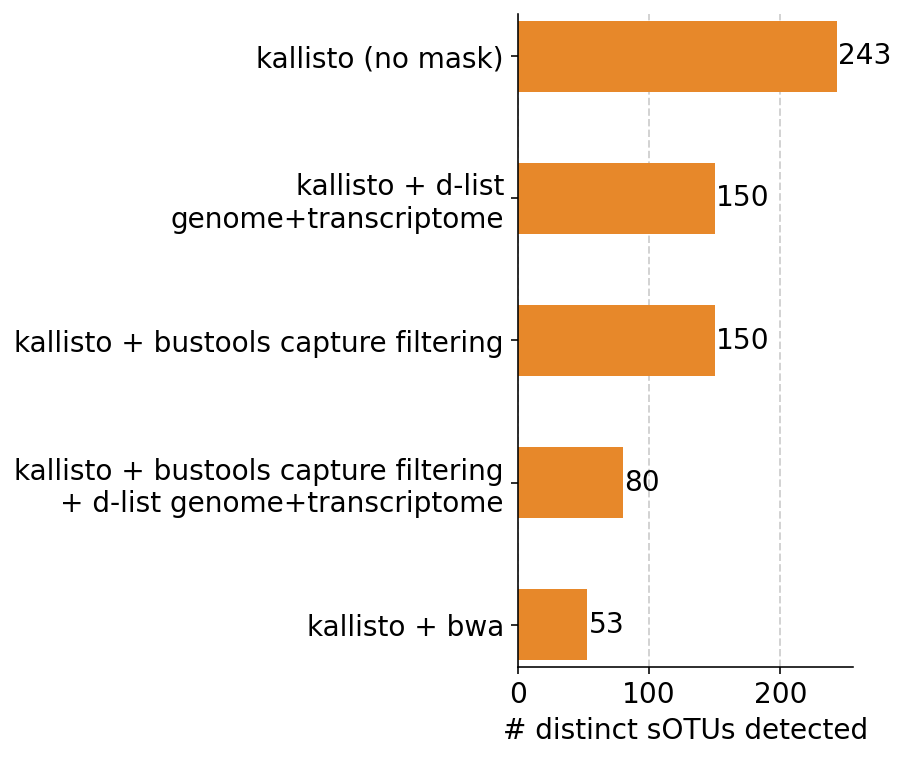

In [16]:
%%time
# Same but horizontal bars
fig, ax = plt.subplots(figsize=(3, 6))
width = 0.5
fontsize = 14

# Get number of viruses with counts > 0
nomask_vcounts = (np.array(nomask_adata[:, nomask_adata.var["v_type"] != "below_threshold"].X.todense()) > 0).sum(0)    
cdna_dna_vcounts = (np.array(cdna_dna_adata[:, cdna_dna_adata.var["v_type"] != "below_threshold"].X.todense()) > 0).sum(0)    
bus_vcounts = (np.array(busfil_adata[:, busfil_adata.var["v_type"] != "below_threshold"].X.todense()) > 0).sum(0)   
bus_cdna_dna_vcounts = (np.array(busfil_cdna_dna_adata[:, busfil_cdna_dna_adata.var["v_type"] != "below_threshold"].X.todense()) > 0).sum(0)   
bwa_vcounts = (np.array(bwa_adata[:, bwa_adata.var["v_type"] != "below_threshold"].X.todense()) > 0).sum(0)    

labels = [
    "kallisto (no mask)",
    "kallisto + d-list\ngenome+transcriptome",
    "kallisto + bustools capture filtering",
    "kallisto + bustools capture filtering\n+ d-list genome+transcriptome",
    "kallisto + bwa",
][::-1]

single_color = "#e7882a"
ax.barh(4, len(nomask_vcounts), width, color=single_color)
ax.text(len(nomask_vcounts)+1, 4, "{:,}".format(len(nomask_vcounts)), color="black", fontsize=fontsize, va="center", ha="left")
ax.barh(3, len(cdna_dna_vcounts), width, color=single_color)
ax.text(len(cdna_dna_vcounts)+1, 3, "{:,}".format(len(cdna_dna_vcounts)), color="black", fontsize=fontsize, va="center", ha="left")
ax.barh(2, len(bus_vcounts), width, color=single_color)
ax.text(len(bus_vcounts)+1, 2, "{:,}".format(len(bus_vcounts)), color="black", fontsize=fontsize, va="center", ha="left")
ax.barh(1, len(bus_cdna_dna_vcounts), width, color=single_color)
ax.text(len(bus_cdna_dna_vcounts)+1, 1, "{:,}".format(len(bus_cdna_dna_vcounts)), color="black", fontsize=fontsize, va="center", ha="left")
ax.barh(0, len(bwa_vcounts), width, color=single_color)
ax.text(len(bwa_vcounts)+1, 0, "{:,}".format(len(bwa_vcounts)), color="black", fontsize=fontsize, va="center", ha="left")

# ax.set_yscale("symlog")
ax.margins(y=0.01)

ax.tick_params(axis="both", labelsize=fontsize)
ax.set_yticks(np.arange(len(labels)), labels, fontsize=fontsize)

# ax.set_xlabel("Workflow", fontsize=fontsize)
ax.set_xlabel("# distinct sOTUs detected", fontsize=fontsize)
ax.spines[["right", "top"]].set_visible(False)

# ax.set_title(f"Number of viruses\ndetected for each workflow", fontsize=fontsize)

ax.grid(True, which="both", color="lightgray", ls="--", lw=1)
ax.set_axisbelow(True)
ax.yaxis.grid(False)

plt.savefig("figures/3.6_bwa_vs_dlist_h_short.png", dpi=300, bbox_inches="tight")

fig.show()

In [438]:
# %%time
# df_virs = pd.DataFrame()

# virus_list = list(
#     set(
#         list(nomask_adata[:, nomask_adata.var["v_type"] != "below_threshold"].var.index)
#         + list(cdna_adata[:, cdna_adata.var["v_type"] != "below_threshold"].var.index)
#         + list(dna_adata[:, dna_adata.var["v_type"] != "below_threshold"].var.index)
#         + list(cdna_dna_adata[:, cdna_dna_adata.var["v_type"] != "below_threshold"].var.index)
#         + list(cdna_dna_amb_adata[:, cdna_dna_amb_adata.var["v_type"] != "below_threshold"].var.index)
#         + list(busfil_adata[:, busfil_adata.var["v_type"] != "below_threshold"].var.index)
#         + list(busfil_cdna_dna_adata[:, busfil_cdna_dna_adata.var["v_type"] != "below_threshold"].var.index)
#         + list(bwa_adata[:, bwa_adata.var["v_type"] != "below_threshold"].var.index)
#         + list(eachK_adata[:, eachK_adata.var["v_type"] != "below_threshold"].var.index)
#     )
# )
# virus_list = np.sort(np.array(virus_list))

# no_mask = []
# cdna_dlist = []
# dna_dlist = []
# cdna_dna_dlist = []
# cdna_dna_amb_dlist = []
# bus = []
# bus_dlist = []
# bwa = []
# eachK_dlist = []
# for i, virus in enumerate(virus_list):
#     no_mask.append(nomask_adata[:, (nomask_adata.var.index == virus) & (nomask_adata.var["v_type"] != "below_threshold")].X.sum())
#     cdna_dlist.append(cdna_adata[:, (cdna_adata.var.index == virus) & (cdna_adata.var["v_type"] != "below_threshold")].X.sum())
#     dna_dlist.append(dna_adata[:, (dna_adata.var.index == virus) & (dna_adata.var["v_type"] != "below_threshold")].X.sum())
#     cdna_dna_dlist.append(cdna_dna_adata[:, (cdna_dna_adata.var.index == virus) & (cdna_dna_adata.var["v_type"] != "below_threshold")].X.sum())
#     cdna_dna_amb_dlist.append(
#         cdna_dna_amb_adata[:, (cdna_dna_amb_adata.var.index == virus) & (cdna_dna_amb_adata.var["v_type"] != "below_threshold")].X.sum()
#     )
#     bus.append(busfil_adata[:, (busfil_adata.var.index == virus) & (busfil_adata.var["v_type"] != "below_threshold")].X.sum())
#     bus_dlist.append(busfil_cdna_dna_adata[:, (busfil_cdna_dna_adata.var.index == virus) & (busfil_cdna_dna_adata.var["v_type"] != "below_threshold")].X.sum())
#     bwa.append(bwa_adata[:, (bwa_adata.var.index == virus) & (bwa_adata.var["v_type"] != "below_threshold")].X.sum())
#     eachK_dlist.append(eachK_adata[:, (eachK_adata.var.index == virus) & (eachK_adata.var["v_type"] != "below_threshold")].X.sum())

# df_virs["virus"] = virus_list
# df_virs["no_mask"] = no_mask
# df_virs["cdna_dlist"] = cdna_dlist
# df_virs["dna_dlist"] = dna_dlist
# df_virs["cdna_dna_dlist"] = cdna_dna_dlist
# df_virs["cdna_dna_amb_dlist"] = cdna_dna_amb_dlist
# df_virs["bus"] = bus
# df_virs["bus_cdna_dna"] = bus_dlist
# df_virs["bwa"] = bwa
# df_virs["eachK_dlist"] = eachK_dlist

# # Sort data frame by virus counts per category
# # df_virs = df_virs.sort_values(["no_mask", "cdna_dlist", "dna_dlist", "cdna_dna_dlist", "bwa"])

# # Sort data frame by whether all categories have the virus
# df_virs["cat_count"] = (
#     df_virs[
#         [
#             "no_mask",
#             "cdna_dlist",
#             "dna_dlist",
#             "cdna_dna_dlist",
#             # "eachK_dlist",
#             "cdna_dna_amb_dlist",
#             "bus",
#             "bus_cdna_dna",
#             "bwa",
#         ]
#     ]
#     > 0
# ).sum(1)
# df_virs = df_virs.sort_values(
#     [
#         "cat_count",
#         "no_mask",
#         "cdna_dlist",
#         "dna_dlist",
#         "cdna_dna_dlist",
#         # "eachK_dlist",
#         "cdna_dna_amb_dlist",
#         "bus",
#         "bus_cdna_dna",
#         "bwa",
#     ]
# )

# df_virs.to_csv("3.6_bwa_vs_dlist.csv", index=False)

# df_virs

CPU times: user 2min 30s, sys: 681 ms, total: 2min 30s
Wall time: 2min 30s


,virus,no_mask,cdna_dlist,dna_dlist,cdna_dna_dlist,cdna_dna_amb_dlist,bus,bus_cdna_dna,bwa,eachK_dlist,cat_count
91,u112941,0.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
232,u40486,0.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
203,u32933,0.0,51.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
67,u10156,0.0,102.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
99,u119245,0.0,109.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
186,u288819,24104.0,24224.0,24231.0,24232.0,24232.0,23933.0,24038.0,23573.0,24232.0,8
209,u33987,25440.0,1416.0,360.0,360.0,65.0,8472.0,75.0,718.0,378.0,8
15,u100031,40800.0,1387.0,373.0,373.0,373.0,33851.0,229.0,289.0,813.0,8
180,u27694,96565.0,5282.0,711.0,712.0,145.0,82778.0,478.0,626.0,712.0,8


In [14]:
df_virs = pd.read_csv("3.6_bwa_vs_dlist.csv")

In [21]:
# virs = [
#     "u10", # Ebola
#     "u102540", # Alphacoronavirus (macaque) + seen in all
#     "u202260", # Wenzhou (shared) + seen in all
#     "u288819", # shared + seen in all
#     "u124433", # macaque lost with bwa - only 4 reads in current file
#     "u275037", # macaque lost with bwa
#     "u45195", # lost with amb but not bwa
#     "u33051", # filtered with dlist but not bwa
#     "u41991", # filtered with dlist but not bwa
#     "u41103", # not in raw or bwa but seen with almost all others
#     "u34155", # not in raw or bwa but seen with almost all others
#     "u100212", # not in raw or bwa but seen with almost all others
#     "u34182", # only raw
#     "u11193",  # only raw
# ]

CPU times: user 317 ms, sys: 12.4 ms, total: 330 ms
Wall time: 320 ms
Parser   : 225 ms


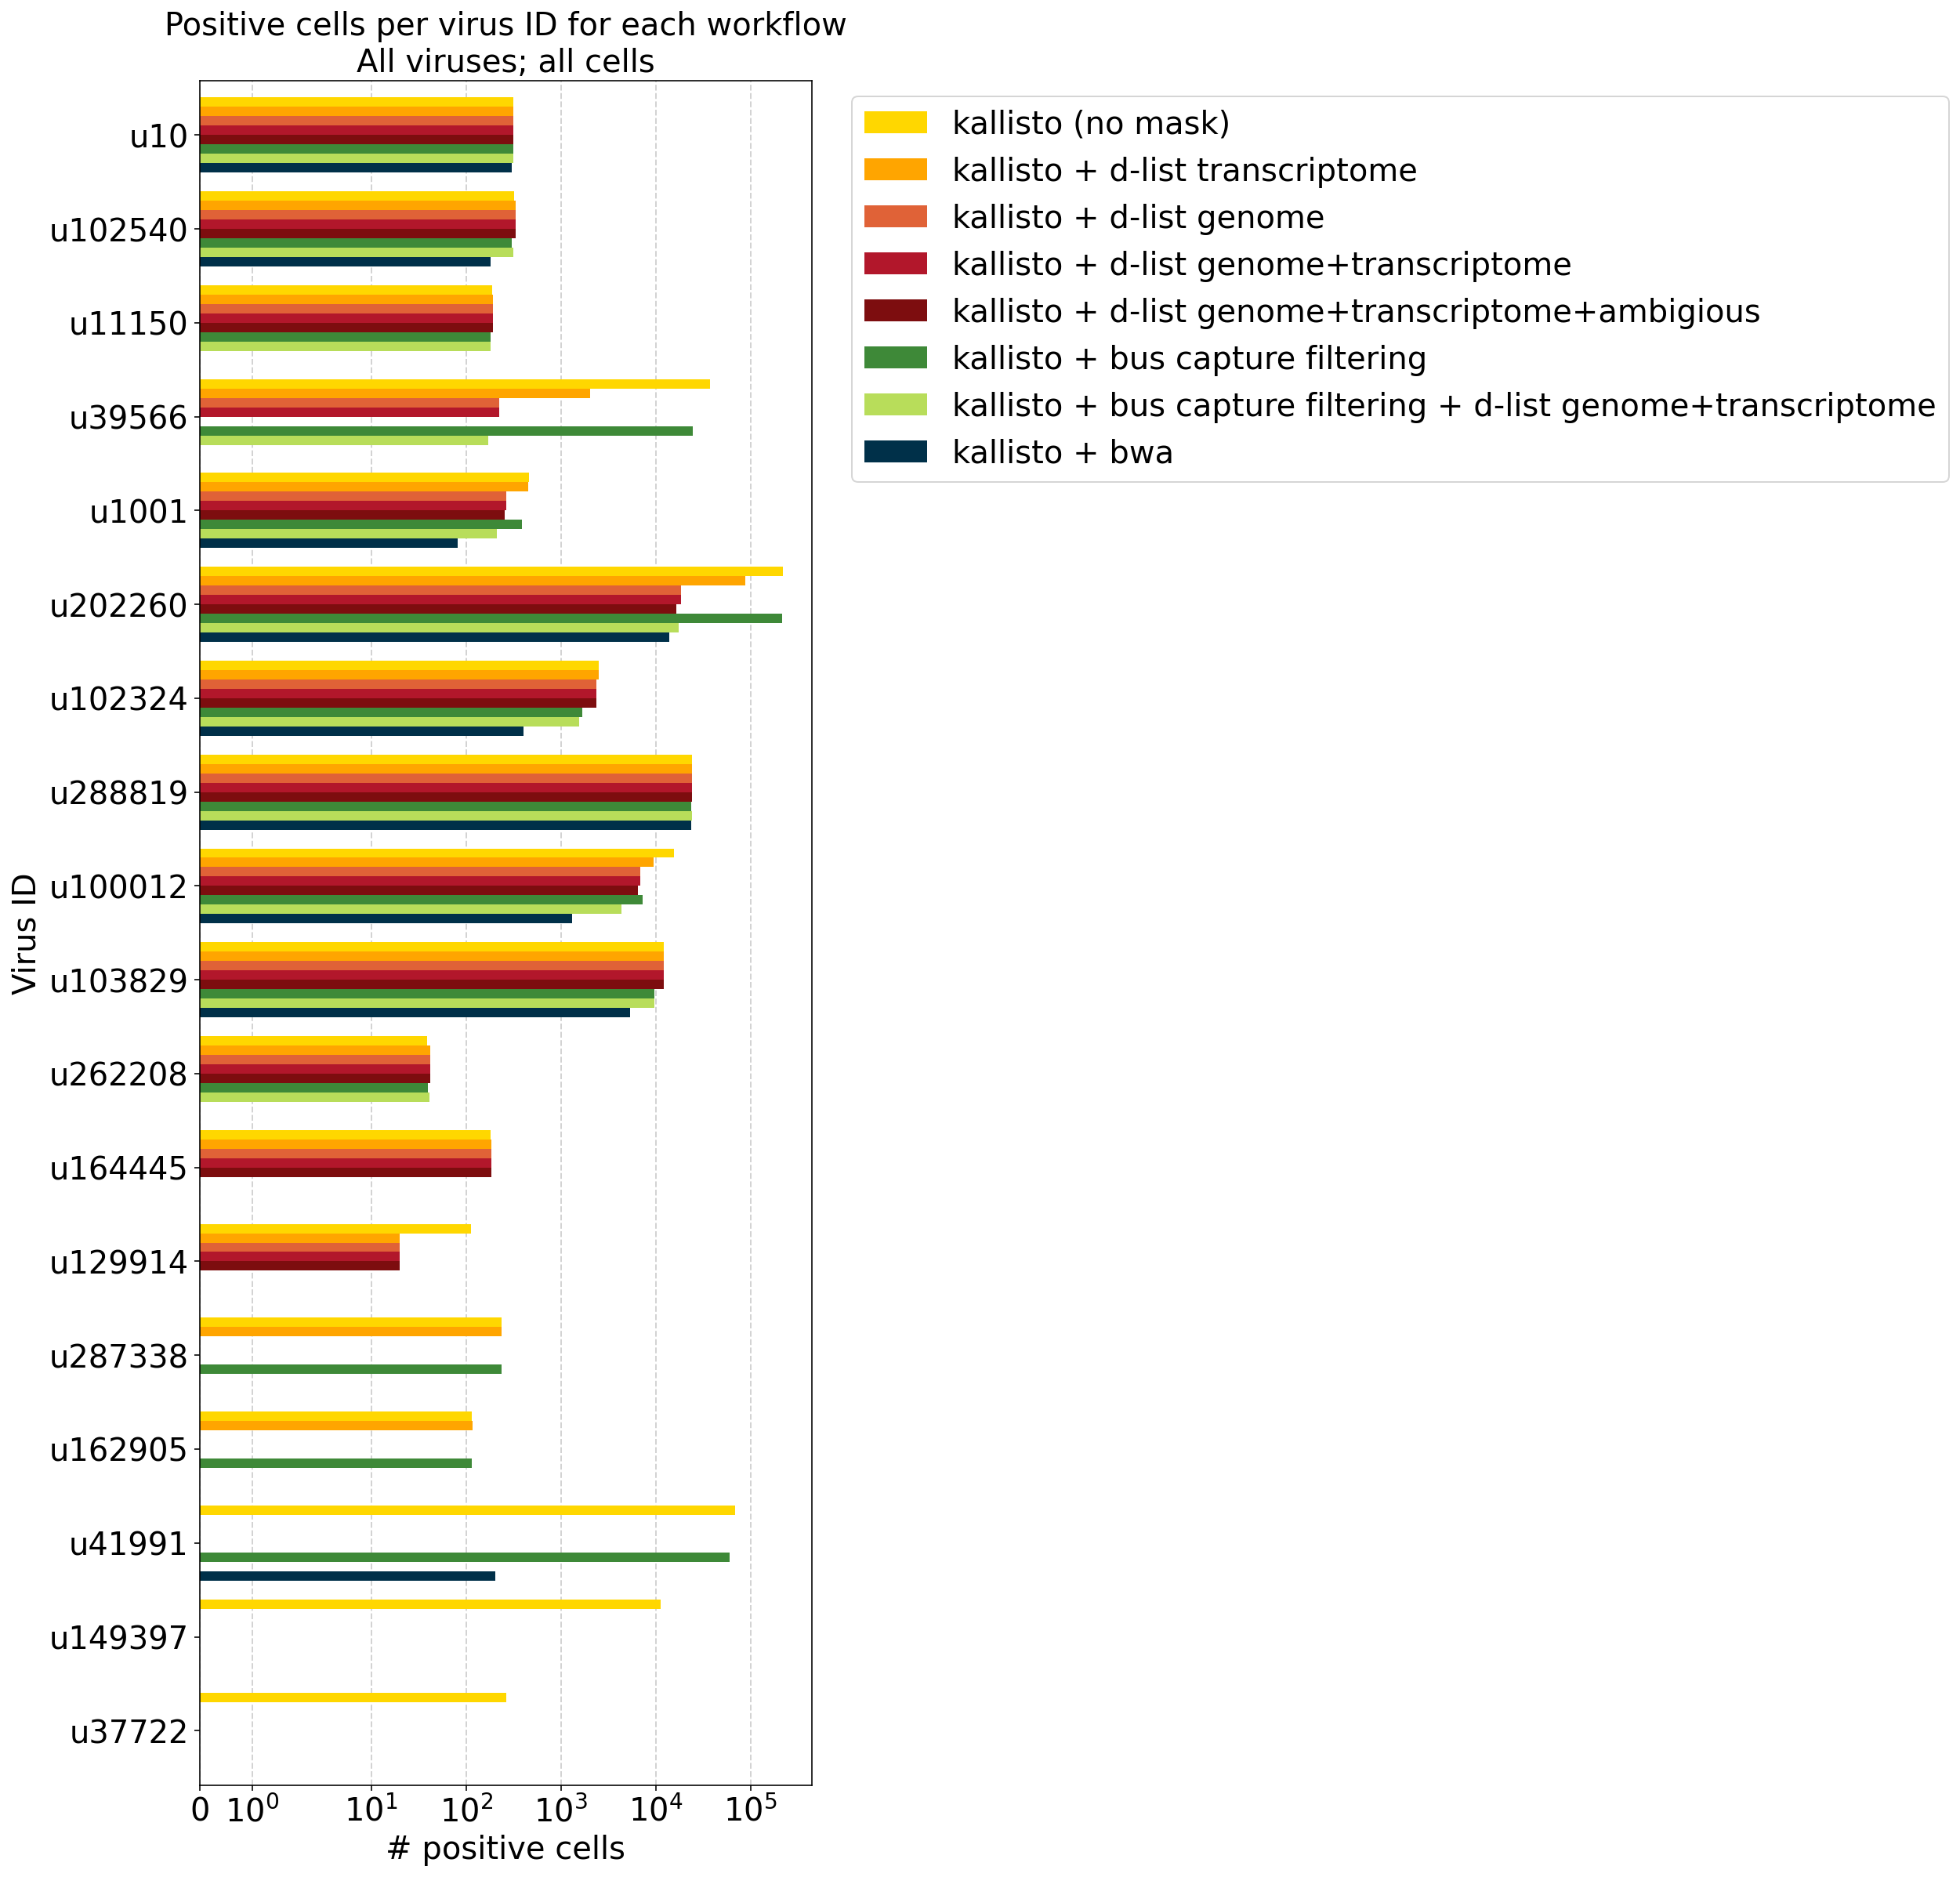

In [24]:
%%time
# Only plot a few viruses instead of all
fig, ax = plt.subplots(figsize=(7, 20))
width = 0.1
fontsize = 20

virs = [
    # macaque only
    'u10', 
    'u102540', 
    'u11150', 
    'u39566',
    # shared (all over the place)
    'u1001',
    'u202260',
    'u102324',
    'u288819',
    # shared (patterned)
    'u100012',
    'u103829',
    # Filtered by bwa only (same for u11150 and u39566)
    'u262208',
    # Not filtered out by d-list
    'u164445',
    'u129914',
    # Not filtered out by capture
    'u287338',
    'u162905',
    # Weird combos
    "u41991",
    # No masking only
    'u149397',
    'u37722'
]

virs = virs[::-1]

for i, virus in enumerate(virs):
    if i == 0:
        ax.barh(i+3.5*width, df_virs[df_virs["virus"] == virus]["no_mask"], width, label="kallisto (no mask)", color=colors[0])
        ax.barh(i+2.5*width, df_virs[df_virs["virus"] == virus]["cdna_dlist"], width, label="kallisto + d-list transcriptome", color=colors[1])
        ax.barh(i+1.5*width, df_virs[df_virs["virus"] == virus]["dna_dlist"], width, label="kallisto + d-list genome", color=colors[2])
        ax.barh(i+width/2, df_virs[df_virs["virus"] == virus]["cdna_dna_dlist"], width, label="kallisto + d-list genome+transcriptome", color=colors[3])
        ax.barh(i-width/2, df_virs[df_virs["virus"] == virus]["cdna_dna_amb_dlist"], width, label="kallisto + d-list genome+transcriptome+ambigious", color=colors[4])
        ax.barh(i-1.5*width, df_virs[df_virs["virus"] == virus]["bus"], width, label="kallisto + bus capture filtering", color=colors[5])
        ax.barh(i-2.5*width, df_virs[df_virs["virus"] == virus]["bus_cdna_dna"], width, label="kallisto + bus capture filtering + d-list genome+transcriptome", color=colors[6])
        ax.barh(i-3.5*width, df_virs[df_virs["virus"] == virus]["bwa"], width, label="kallisto + bwa", color=colors[7])
        # ax.barh(i-4*width, df_virs[df_virs["virus"] == virus]["eachK_dlist"], width, label="kallisto + d-list genome+transcriptome\n(each k-mer checked)", color=colors[7])
        
    else:
        ax.barh(i+3.5*width, df_virs[df_virs["virus"] == virus]["no_mask"], width, color=colors[0])
        ax.barh(i+2.5*width, df_virs[df_virs["virus"] == virus]["cdna_dlist"], width, color=colors[1])
        ax.barh(i+1.5*width, df_virs[df_virs["virus"] == virus]["dna_dlist"], width, color=colors[2])
        ax.barh(i+width/2, df_virs[df_virs["virus"] == virus]["cdna_dna_dlist"], width, color=colors[3])
        ax.barh(i-width/2, df_virs[df_virs["virus"] == virus]["cdna_dna_amb_dlist"], width, color=colors[4])
        ax.barh(i-1.5*width, df_virs[df_virs["virus"] == virus]["bus"], width, color=colors[5])
        ax.barh(i-2.5*width, df_virs[df_virs["virus"] == virus]["bus_cdna_dna"], width, color=colors[6])
        ax.barh(i-3.5*width, df_virs[df_virs["virus"] == virus]["bwa"], width, color=colors[7])
        # ax.barh(i-4*width, df_virs[df_virs["virus"] == virus]["eachK_dlist"], width, color=colors[7])
        
ax.legend(fontsize=fontsize, loc='upper left', bbox_to_anchor=(1.04, 1))

ax.set_xscale("symlog")
ax.margins(y=0.01)

ax.tick_params(axis="both", labelsize=fontsize)
ax.set_yticks(np.arange(len(virs)), virs, fontsize=fontsize)

ax.set_ylabel("Virus ID", fontsize=fontsize)
ax.set_xlabel("# positive cells", fontsize=fontsize)

ax.set_title(f"Positive cells per virus ID for each workflow\nAll viruses; all cells", fontsize=fontsize)

ax.grid(True, which="both", color="lightgray", ls="--", lw=1)
ax.set_axisbelow(True)
ax.yaxis.grid(False)

# plt.savefig("figures/3.6_bwa_vs_dlist_per_virus_short.png", dpi=300, bbox_inches="tight")

fig.show()

CPU times: user 1.63 s, sys: 314 ms, total: 1.94 s
Wall time: 1.46 s


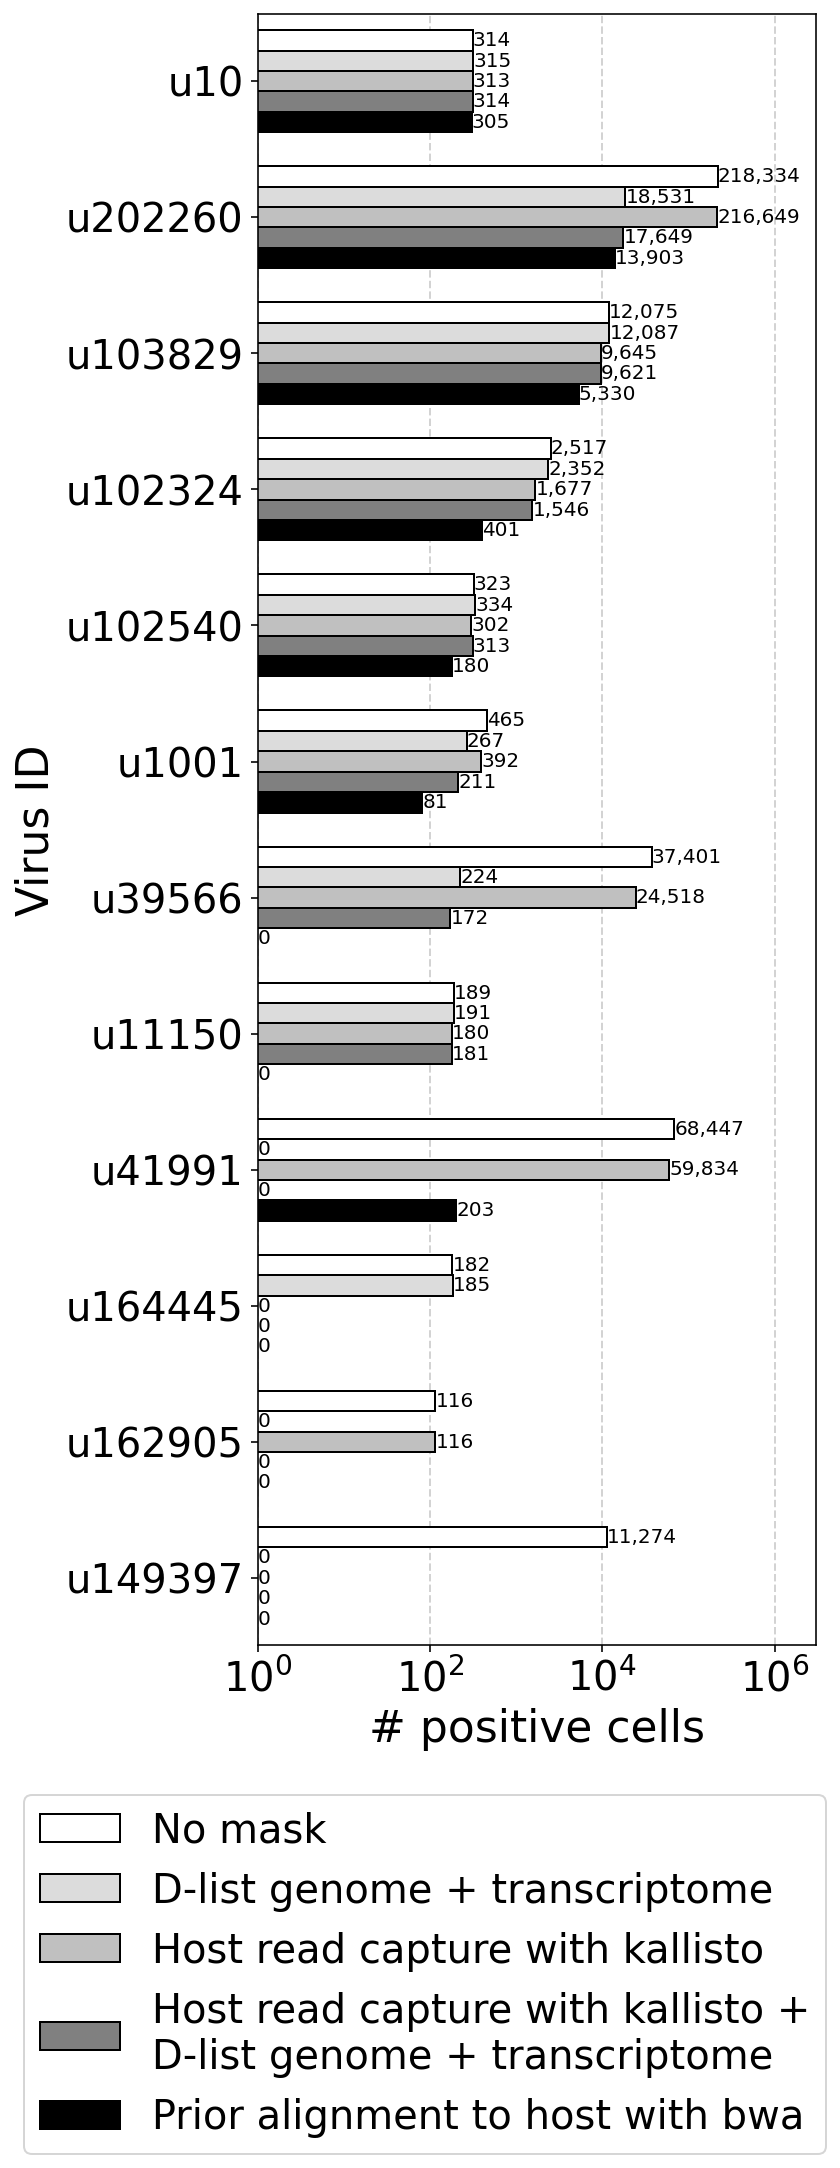

In [52]:
%%time
# Only plot a few viruses instead of all
fig, ax = plt.subplots(figsize=(5, 15))
width = 0.15
fontsize = 20

colors = [
    "white",
    "#DCDCDC", 
    "#C0C0C0",
    "#808080",
    "black",
]
ec="black"
    
    
virs = [
    'u10',
    'u202260',
    'u103829',
    'u102324',
    'u102540', 
    'u1001',
    'u39566',
    'u11150', 
    "u41991",
    'u164445',
    'u162905',
    'u149397',
    
    # # macaque only
    # 'u10', 
    # 'u102540', 
    # 'u11150', 
    # 'u39566',
    # # shared (all over the place)
    # 'u1001',
    # 'u202260',
    # 'u102324',
    # # 'u288819',
    # # shared (patterned)
    # # 'u100012',
    # 'u103829',
    # # Filtered by bwa only (same for u11150 and u39566)
    # # 'u262208',
    # # Not filtered out by d-list
    # 'u164445',
    # # 'u129914',
    # # Not filtered out by capture
    # # 'u287338',
    # 'u162905',
    # # Weird combos
    # "u41991",
    # # No masking only
    # 'u149397',
    # # 'u37722'
]

virs = virs[::-1]
mask_ops = ["no_mask", "cdna_dna_dlist", "bus", "bus_cdna_dna", "bwa"] 
labels = ["No mask", "D-list genome + transcriptome", "Host read capture with kallisto", "Host read capture with kallisto +\nD-list genome + transcriptome", "Prior alignment to host with bwa"] 
for i, virus in enumerate(virs):
    y_locs = [i+2*width, i+width, i, i-width, i-2*width]  
    
    if i == 0:
        for color_idx, (y, mask_opt, label) in enumerate(zip(y_locs, mask_ops, labels)):
            count = int(df_virs[df_virs["virus"] == virus][mask_opt].values[0])
            # Plot bar plot with label
            ax.barh(y, count, width, label=label, color=colors[color_idx], edgecolor=ec, lw=1)
            # if count > 0:
            # Add text next to bar
            ax.text(count+1, y, "{:,}".format(count), fontsize=fontsize-10, va="center")
        
    else:
        for color_idx, (y, mask_opt) in enumerate(zip(y_locs, mask_ops)):
            count = int(df_virs[df_virs["virus"] == virus][mask_opt].values[0])
            # Plot bar plot without label
            ax.barh(y, count, width, color=colors[color_idx], edgecolor=ec, lw=1)
            # if count > 0:
            # Add text next to bar
            ax.text(count+1, y, "{:,}".format(count), fontsize=fontsize-10, va="center")
        
# ax.legend(fontsize=fontsize, loc='upper left', bbox_to_anchor=(1.04, 1))
ax.legend(fontsize=fontsize, loc='upper center', bbox_to_anchor=(0.3, -0.08))

ax.set_xscale("log")
ax.margins(y=0.01)
ax.set_xlim(left=1, right=12**6)

ax.tick_params(axis="both", labelsize=fontsize)
ax.set_yticks(np.arange(len(virs)), virs, fontsize=fontsize)

ax.set_ylabel("Virus ID", fontsize=fontsize+2)
ax.set_xlabel("# positive cells", fontsize=fontsize+2)

# ax.set_title(f"# positive cells per sOTU", fontsize=fontsize)

ax.grid(True, which="both", color="lightgray", ls="--", lw=1)
ax.set_axisbelow(True)
ax.yaxis.grid(False)

plt.savefig("figures/3.6_bwa_vs_dlist_per_virus_short.png", dpi=300, bbox_inches="tight")

fig.show()

CPU times: user 12.1 s, sys: 1.09 s, total: 13.2 s
Wall time: 12.9 s


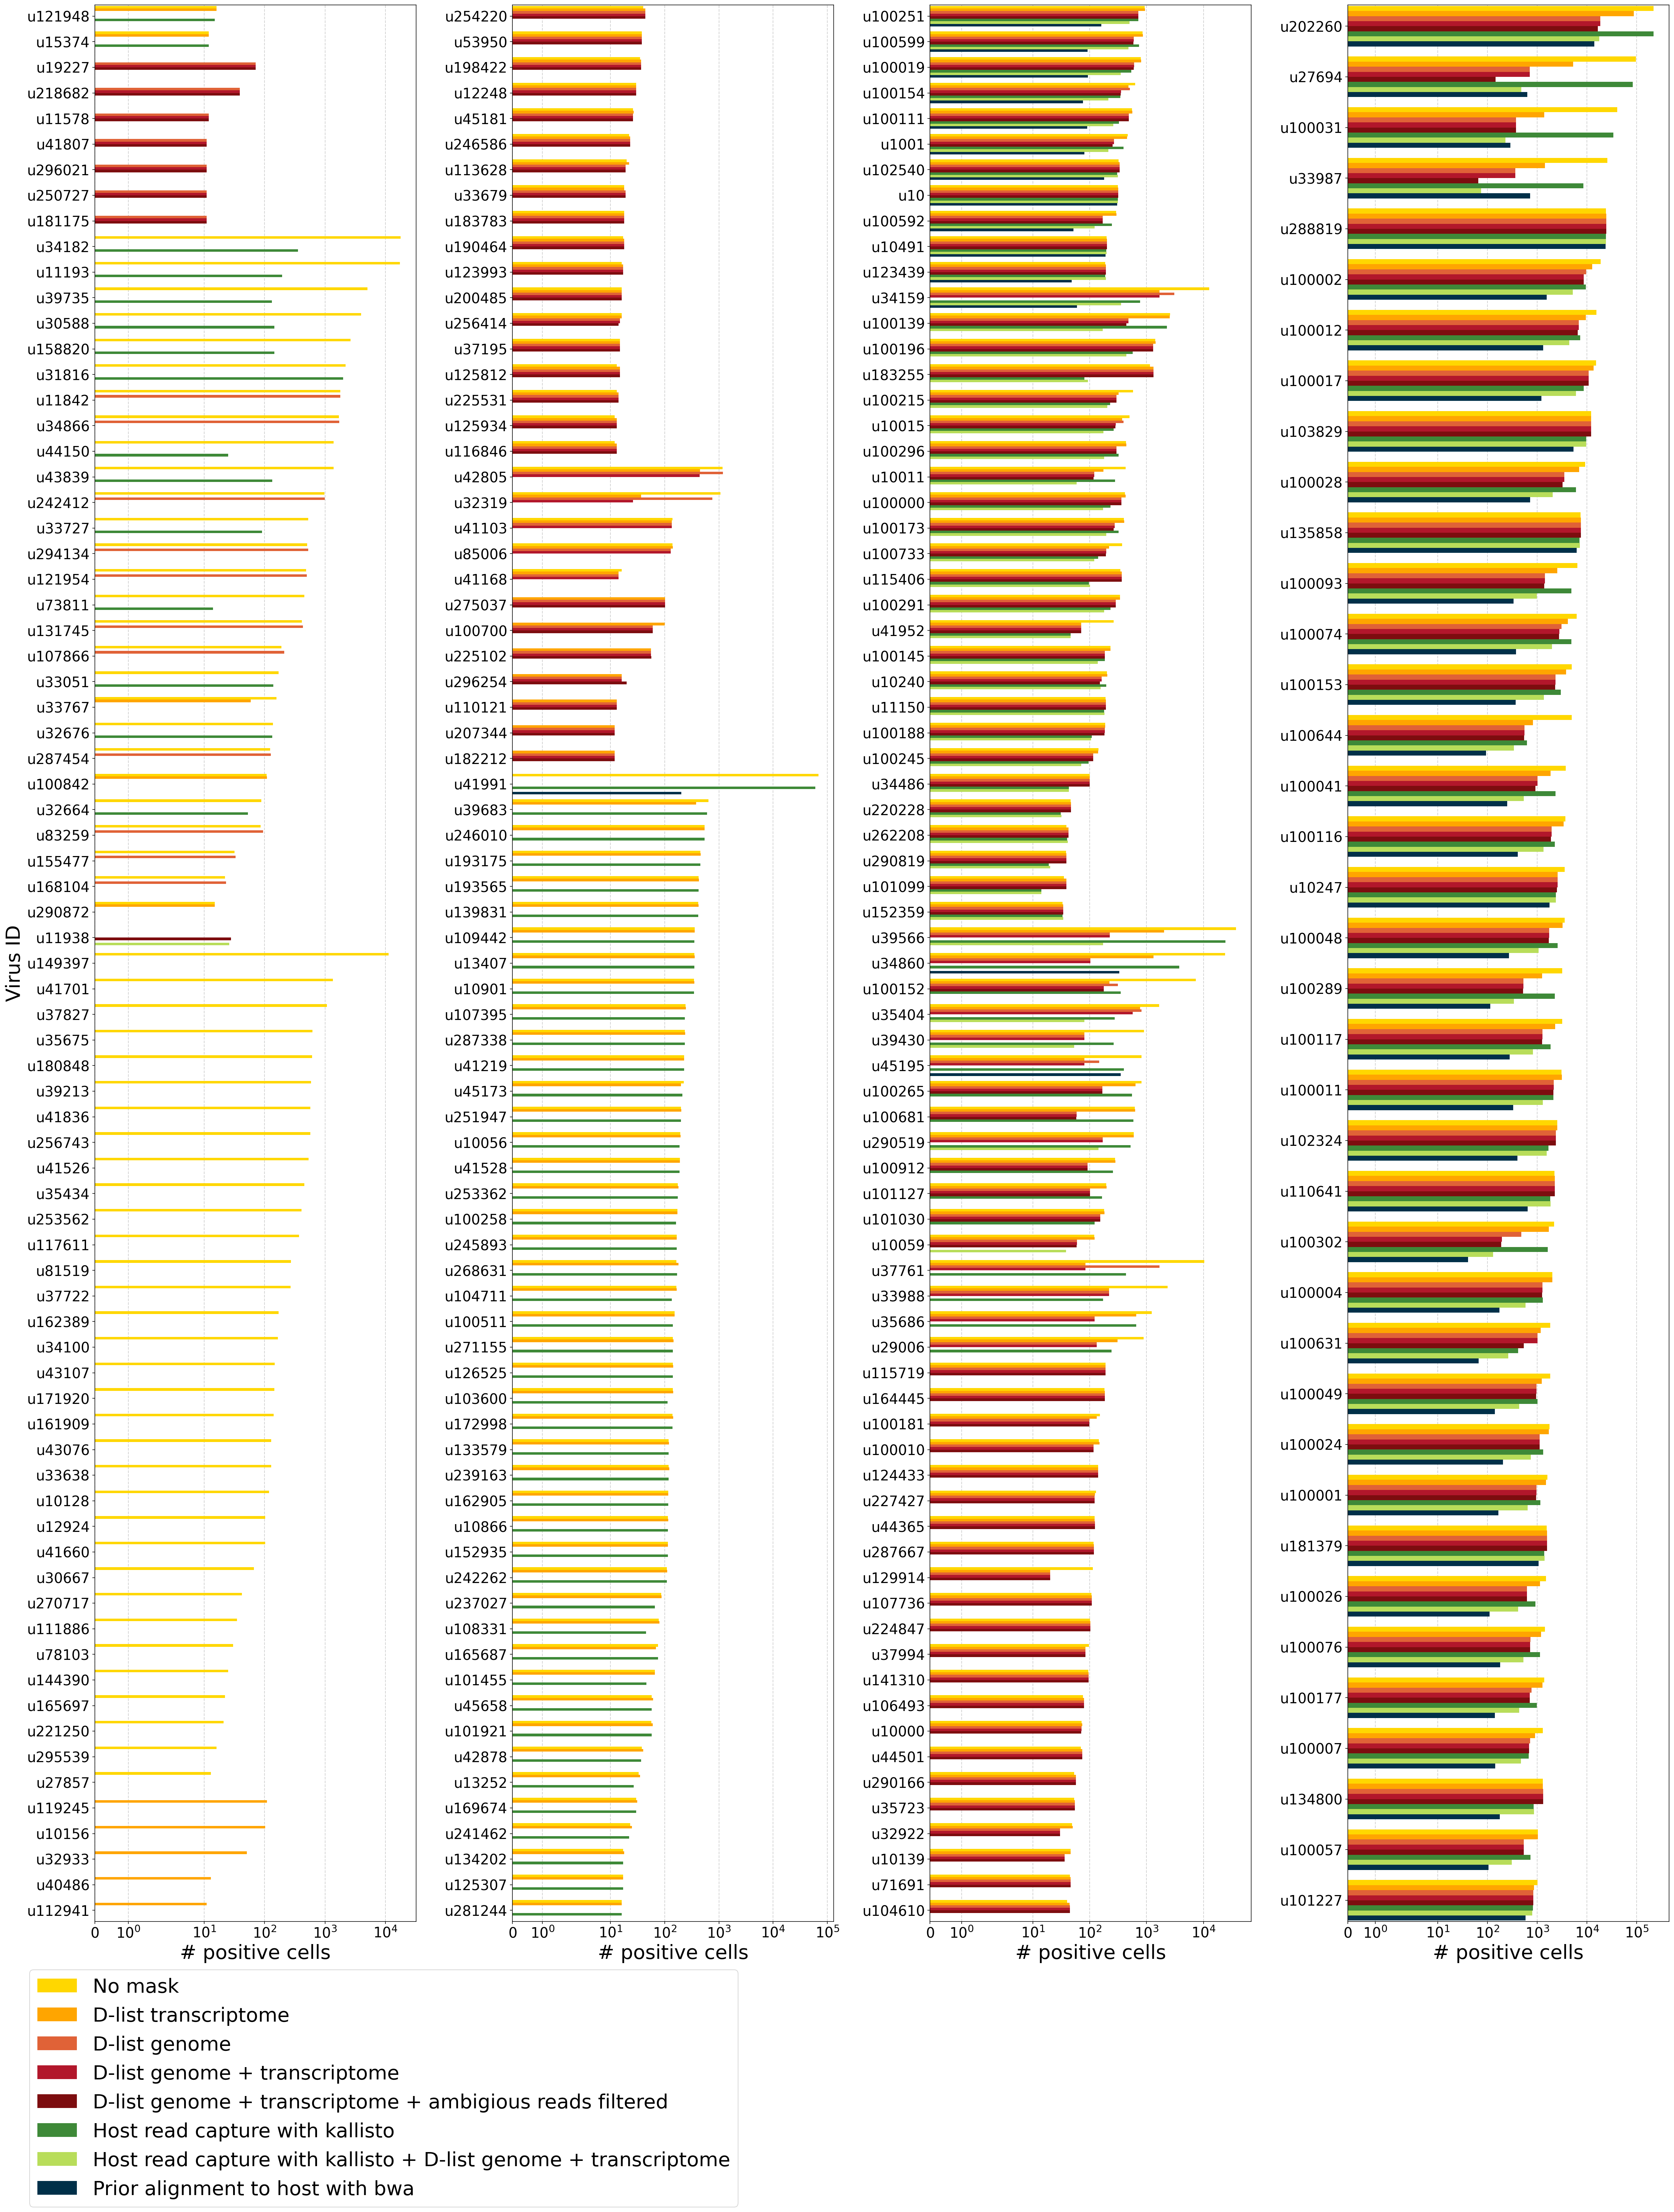

In [27]:
%%time
virs_per_col = 75
ncols = int(np.ceil(len(df_virs["virus"].values) / virs_per_col))

fig, axs = plt.subplots(figsize=(ncols*10, 50), ncols=ncols, gridspec_kw={'wspace': 0.3})
width = 0.1
fontsize = 20

master_vir_labels = []
vir_labels = []
ax_num = 0
ax = axs[ax_num]
vir_count = 0
for i, virus in enumerate(df_virs["virus"].values):
    if vir_count >= virs_per_col:
        master_vir_labels.append(vir_labels)
        ax_num += 1
        ax = axs[ax_num]
        vir_labels = []
        vir_count = 0

    if i == 0:
        ax.barh(i+3.5*width, df_virs[df_virs["virus"] == virus]["no_mask"], width, label="No mask", color=colors[0])
        ax.barh(i+2.5*width, df_virs[df_virs["virus"] == virus]["cdna_dlist"], width, label="D-list transcriptome", color=colors[1])
        ax.barh(i+1.5*width, df_virs[df_virs["virus"] == virus]["dna_dlist"], width, label="D-list genome", color=colors[2])
        ax.barh(i+width/2, df_virs[df_virs["virus"] == virus]["cdna_dna_dlist"], width, label="D-list genome + transcriptome", color=colors[3])
        ax.barh(i-width/2, df_virs[df_virs["virus"] == virus]["cdna_dna_amb_dlist"], width, label="D-list genome + transcriptome + ambigious reads filtered", color=colors[4])
        ax.barh(i-1.5*width, df_virs[df_virs["virus"] == virus]["bus"], width, label="Host read capture with kallisto", color=colors[5])
        ax.barh(i-2.5*width, df_virs[df_virs["virus"] == virus]["bus_cdna_dna"], width, label="Host read capture with kallisto + D-list genome + transcriptome", color=colors[6])
        ax.barh(i-3.5*width, df_virs[df_virs["virus"] == virus]["bwa"], width, label="Prior alignment to host with bwa", color=colors[7])
        # ax.barh(i-4*width, df_virs[df_virs["virus"] == virus]["eachK_dlist"], width, label="kallisto + d-list genome+transcriptome\n(each k-mer checked)", color=colors[7])
        vir_labels.append(virus)
        vir_count += 1
        
    else:
        ax.barh(i+3.5*width, df_virs[df_virs["virus"] == virus]["no_mask"], width, color=colors[0])
        ax.barh(i+2.5*width, df_virs[df_virs["virus"] == virus]["cdna_dlist"], width, color=colors[1])
        ax.barh(i+1.5*width, df_virs[df_virs["virus"] == virus]["dna_dlist"], width, color=colors[2])
        ax.barh(i+width/2, df_virs[df_virs["virus"] == virus]["cdna_dna_dlist"], width, color=colors[3])
        ax.barh(i-width/2, df_virs[df_virs["virus"] == virus]["cdna_dna_amb_dlist"], width, color=colors[4])
        ax.barh(i-1.5*width, df_virs[df_virs["virus"] == virus]["bus"], width, color=colors[5])
        ax.barh(i-2.5*width, df_virs[df_virs["virus"] == virus]["bus_cdna_dna"], width, color=colors[6])
        ax.barh(i-3.5*width, df_virs[df_virs["virus"] == virus]["bwa"], width, color=colors[7])
        # ax.barh(i-4*width, df_virs[df_virs["virus"] == virus]["eachK_dlist"], width, color=colors[7])
        vir_labels.append(virus)
        vir_count += 1
        
    if i == len(df_virs["virus"].values)-1:
        master_vir_labels.append(vir_labels)

axs[0].legend(fontsize=fontsize+8, loc='upper center', bbox_to_anchor=(0.9, -0.02))
axs[0].set_ylabel("Virus ID", fontsize=fontsize+8)

y_label_buffer = 0
for vir_labels, ax in zip(master_vir_labels, axs):
    ax.set_xscale("symlog")
    ax.margins(y=0.0005)
    ax.set_yticks(np.arange(len(vir_labels)) + y_label_buffer, vir_labels, fontsize=fontsize)
    ax.set_xlabel("# positive cells", fontsize=fontsize+8)
    ax.tick_params(axis="both", labelsize=fontsize)
    y_label_buffer += virs_per_col
    
    ax.grid(True, which="both", color="lightgray", ls="--", lw=1)
    ax.set_axisbelow(True)
    ax.yaxis.grid(False)

# ax.set_title(f"Positive cells per virus ID for each workflow\nAll viruses; all cells", fontsize=fontsize)

plt.savefig("figures/3.6_bwa_vs_dlist_per_virus.png", dpi=300, bbox_inches="tight")

fig.show()

In [400]:
%%time
fig, ax = plt.subplots(figsize=(7, 7))
width = 0.8
fontsize = 14

# Get counts of viruses with counts > 0
nomask_vcounts = (np.array(nomask_adata[:, nomask_adata.var["v_type"]=="macaca_only"].X.todense()) > 0).sum(0)    
dna_vcounts = (np.array(dna_adata[:, dna_adata.var["v_type"]=="macaca_only"].X.todense()) > 0).sum(0)    
cdna_vcounts = (np.array(cdna_adata[:, cdna_adata.var["v_type"]=="macaca_only"].X.todense()) > 0).sum(0)    
cdna_dna_vcounts = (np.array(cdna_dna_adata[:, cdna_dna_adata.var["v_type"]=="macaca_only"].X.todense()) > 0).sum(0)    
bwa_vcounts = (np.array(bwa_adata[:, bwa_adata.var["v_type"]=="macaca_only"].X.todense()) > 0).sum(0)    

labels = [
    "kallisto (no mask)",
    "kallisto + d-list\ntranscriptome",
    "kallisto + d-list\ngenome",
    "kallisto + d-list\ngenome+transcriptome",
    "kallisto + bwa"
]

ax.bar(0, len(nomask_vcounts), width, color=colors[0])
ax.bar(1, len(cdna_vcounts), width, color=colors[1])
ax.bar(2, len(dna_vcounts), width, color=colors[2])
ax.bar(3, len(cdna_dna_vcounts), width, color=colors[3])
ax.bar(4, len(bwa_vcounts), width, color=colors[4])

# ax.set_yscale("symlog")
ax.margins(x=0.05)

ax.tick_params(axis="both", labelsize=fontsize)
ax.set_xticks(np.arange(len(labels)), labels, rotation=45, ha="right", fontsize=fontsize)

# ax.set_xlabel("Workflow", fontsize=fontsize)
ax.set_ylabel("# sOTUs detected", fontsize=fontsize)

ax.set_title(f"Number of viruses detected for each workflow\nMacaque only viruses; all cells", fontsize=fontsize)

# ax.grid(True, which="both", color="lightgray", ls="--", lw=1)
# ax.set_axisbelow(True)

# plt.savefig("figures/3.6_bwa_vs_dlist.png", dpi=300, bbox_inches="tight")

fig.show()

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7f97018f3820> (for post_execute):



KeyboardInterrupt



In [401]:
%%time
fig, ax = plt.subplots(figsize=(7, 7))
width = 0.8
fontsize = 14

# Get counts of viruses with counts > 0
nomask_vcounts = (np.array(nomask_adata[:, nomask_adata.var["v_type"]=="canis_only"].X.todense()) > 0).sum(0)    
dna_vcounts = (np.array(dna_adata[:, dna_adata.var["v_type"]=="canis_only"].X.todense()) > 0).sum(0)    
cdna_vcounts = (np.array(cdna_adata[:, cdna_adata.var["v_type"]=="canis_only"].X.todense()) > 0).sum(0)    
cdna_dna_vcounts = (np.array(cdna_dna_adata[:, cdna_dna_adata.var["v_type"]=="canis_only"].X.todense()) > 0).sum(0)    
bwa_vcounts = (np.array(bwa_adata[:, bwa_adata.var["v_type"]=="canis_only"].X.todense()) > 0).sum(0)    

labels = [
    "kallisto (no mask)",
    "kallisto + d-list\ntranscriptome",
    "kallisto + d-list\ngenome",
    "kallisto + d-list\ngenome+transcriptome",
    "kallisto + bwa"
]

ax.bar(0, len(nomask_vcounts), width, color=colors[0])
ax.bar(1, len(cdna_vcounts), width, color=colors[1])
ax.bar(2, len(dna_vcounts), width, color=colors[2])
ax.bar(3, len(cdna_dna_vcounts), width, color=colors[3])
ax.bar(4, len(bwa_vcounts), width, color=colors[4])

# ax.set_yscale("symlog")
ax.margins(x=0.05)

ax.tick_params(axis="both", labelsize=fontsize)
ax.set_xticks(np.arange(len(labels)), labels, rotation=45, ha="right", fontsize=fontsize)

# ax.set_xlabel("Workflow", fontsize=fontsize)
ax.set_ylabel("# sOTUs detected", fontsize=fontsize)

ax.set_title(f"Number of viruses detected for each workflow\nCanis only viruses; all cells", fontsize=fontsize)

# ax.grid(True, which="both", color="lightgray", ls="--", lw=1)
# ax.set_axisbelow(True)

# plt.savefig("figures/3.6_bwa_vs_dlist.png", dpi=300, bbox_inches="tight")

fig.show()

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7f97018f3820> (for post_execute):



KeyboardInterrupt



Exception ignored in: <generator object iter_fields at 0x7f9642b27ba0>
Traceback (most recent call last):
  File "/home/laura/anaconda3/lib/python3.9/ast.py", line 251, in iter_fields
    yield field, getattr(node, field)
KeyboardInterrupt: 

KeyboardInterrupt



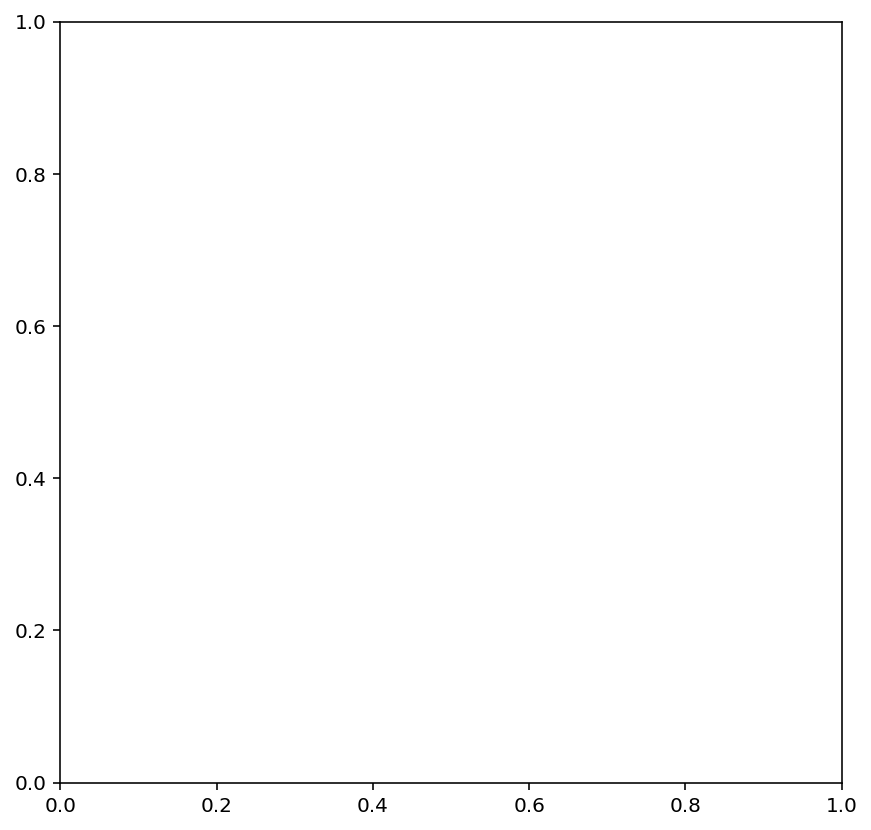

In [402]:
%%time
fig, ax = plt.subplots(figsize=(7, 7))
width = 0.8
fontsize = 14

# Get counts of viruses with counts > 0
nomask_vcounts = (np.array(nomask_adata[:, nomask_adata.var["v_type"]=="shared"].X.todense()) > 0).sum(0)    
dna_vcounts = (np.array(dna_adata[:, dna_adata.var["v_type"]=="shared"].X.todense()) > 0).sum(0)    
cdna_vcounts = (np.array(cdna_adata[:, cdna_adata.var["v_type"]=="shared"].X.todense()) > 0).sum(0)    
cdna_dna_vcounts = (np.array(cdna_dna_adata[:, cdna_dna_adata.var["v_type"]=="shared"].X.todense()) > 0).sum(0)    
bwa_vcounts = (np.array(bwa_adata[:, bwa_adata.var["v_type"]=="shared"].X.todense()) > 0).sum(0)    

labels = [
    "kallisto (no mask)",
    "kallisto + d-list\ntranscriptome",
    "kallisto + d-list\ngenome",
    "kallisto + d-list\ngenome+transcriptome",
    "kallisto + bwa"
]

ax.bar(0, len(nomask_vcounts), width, color=colors[0])
ax.bar(1, len(cdna_vcounts), width, color=colors[1])
ax.bar(2, len(dna_vcounts), width, color=colors[2])
ax.bar(3, len(cdna_dna_vcounts), width, color=colors[3])
ax.bar(4, len(bwa_vcounts), width, color=colors[4])

# ax.set_yscale("symlog")
ax.margins(x=0.05)

ax.tick_params(axis="both", labelsize=fontsize)
ax.set_xticks(np.arange(len(labels)), labels, rotation=45, ha="right", fontsize=fontsize)

# ax.set_xlabel("Workflow", fontsize=fontsize)
ax.set_ylabel("# sOTUs detected", fontsize=fontsize)

ax.set_title(f"Number of viruses detected for each workflow\nShared viruses; all cells", fontsize=fontsize)

# ax.grid(True, which="both", color="lightgray", ls="--", lw=1)
# ax.set_axisbelow(True)

# plt.savefig("figures/3.6_bwa_vs_dlist.png", dpi=300, bbox_inches="tight")

fig.show()